In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 

clean_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

df = clean_df.copy()

In [ ]:
reducer = umap.UMAP()

In [ ]:
to_keep = ['naturales_Bajo_Basico','naturales_Basico', 'naturales_satisfactorio', 'naturales_avanzado', 'sociales_Bajo_Basico', 'sociales_Basico'
  , 'sociales_satisfactorio', 'sociales_avanzado', 'lengua_Bajo_Basico', 'lengua_Basico', 'lengua_satisfactorio', 'lengua_avanzado',
  'Mate_Bajo_Basico', 'Mate_Basico', 'Mate_satisfactorio', 'Mate_avanzado'
]
df = df[to_keep]

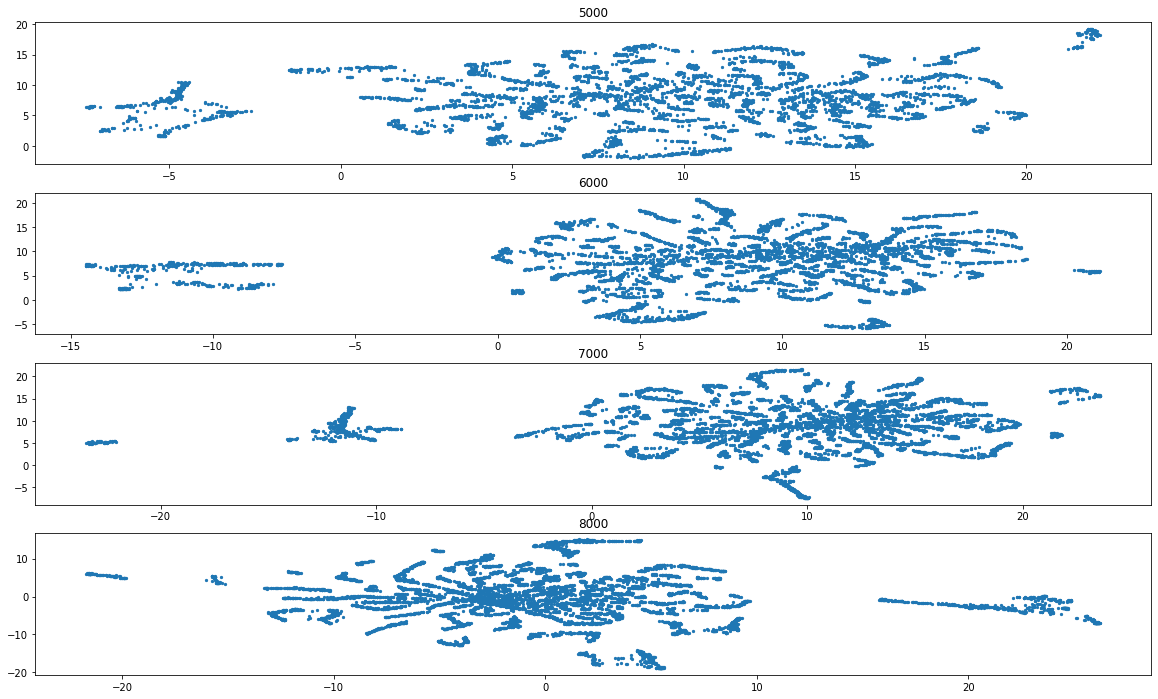

In [ ]:
fig, ax = plt.subplots(4, figsize=(20, 12))
reducer = umap.UMAP(n_neighbors=50, min_dist=0.5, metric='manhattan')
for i in range(4):
  n = 5000 + i*1000
  embedding = reducer.fit_transform(df.sample(n) )
  ax[i].scatter(embedding[:, 0], embedding[:, 1], s=5)
  ax[i].set_title(n)

In [ ]:
df = clean_df.copy()
#df.reset_index(inplace=True)

In [ ]:
not_nan = (df.mate_nc_na == 0) & (df.lengua_nc_na == 0) & (df.naturales_nc_na == 0) & (df.sociales_nc_na == 0)
train = df[not_nan]

test = df[~not_nan]

In [ ]:
to_keep = ['naturales_Bajo_Basico','naturales_Basico', 'naturales_satisfactorio', 'naturales_avanzado', 'sociales_Bajo_Basico', 'sociales_Basico'
  , 'sociales_satisfactorio', 'sociales_avanzado', 'lengua_Bajo_Basico', 'lengua_Basico', 'lengua_satisfactorio', 'lengua_avanzado',
  'Mate_Bajo_Basico', 'Mate_Basico', 'Mate_satisfactorio', 'Mate_avanzado'
]
train = train[to_keep]

In [ ]:
%%time
mapper = umap.UMAP(n_neighbors=50, min_dist=0.1, metric='manhattan')

mapper = mapper.fit(train.iloc[0:30000,:])

CPU times: user 3min 20s, sys: 8.98 s, total: 3min 29s
Wall time: 1min 59s


In [ ]:
a = mapper.transform(train.iloc[30000:40000,:])

In [ ]:
a.shape

(10000, 2)

In [ ]:
%%time
batch_size = 5000
start = 10000
stop = 100000

for i in range((len(train)-start)%batch_size+1):
  print(f"start: {i*batch_size+start}")
  if i*batch_size > stop: 
    break
  lower = i*batch_size + start
  upper = lower + batch_size
  mapper.transform(train.iloc[lower:upper,:])

start: 10000
start: 15000
start: 20000
start: 25000
start: 30000
start: 35000
start: 40000
start: 45000
start: 50000
start: 55000
start: 60000
start: 65000
start: 70000
start: 75000
start: 80000
start: 85000
start: 90000
start: 95000
start: 100000
start: 105000
start: 110000
start: 115000
CPU times: user 5min 19s, sys: 1.85 s, total: 5min 21s
Wall time: 3min 25s


In [ ]:
import seaborn as sns

In [ ]:
#sns.scatterplot(mapper.embedding_[:, 0], mapper.embedding_[:, 1], hue)


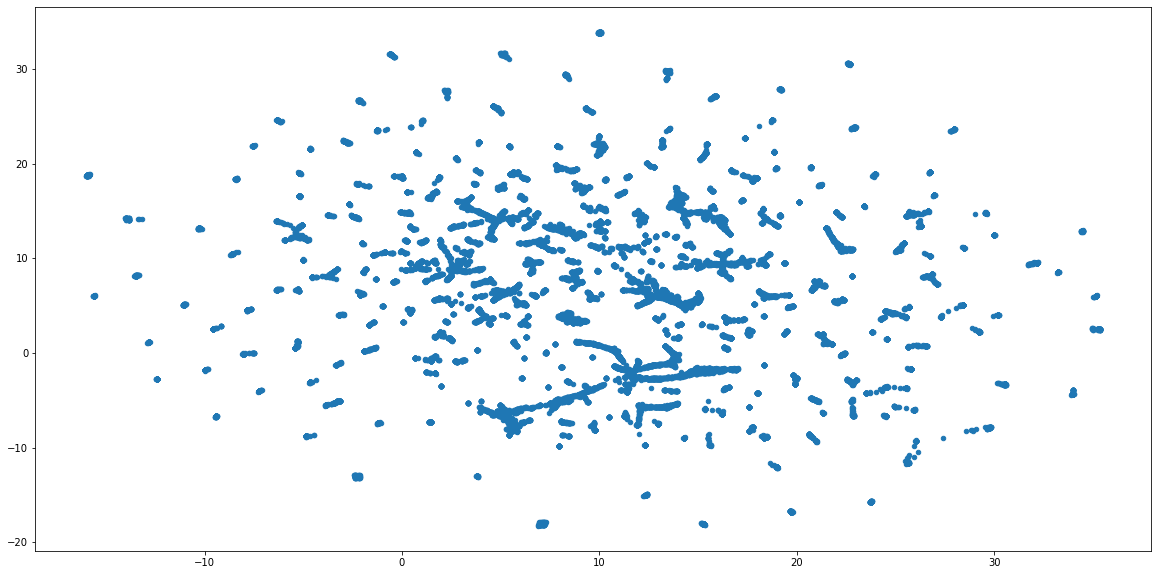

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=20, cmap='Spectral') #euclidean

**UMAP n_components = 50, n_neighbors=50, min_dist=0.1, metric='manhattan'**

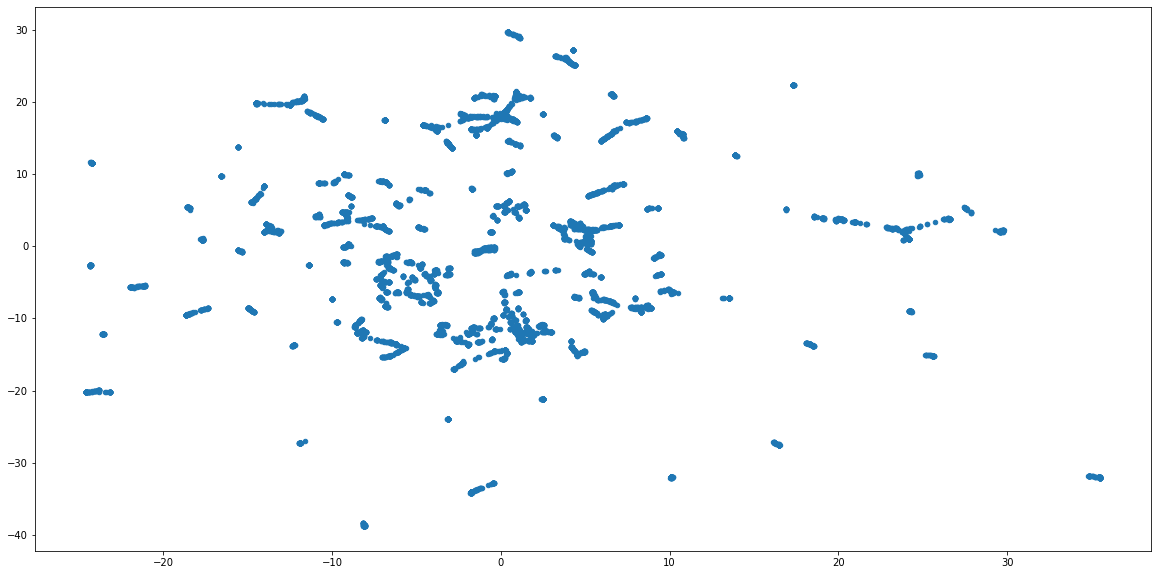

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=20, cmap='Spectral') # manhattan 

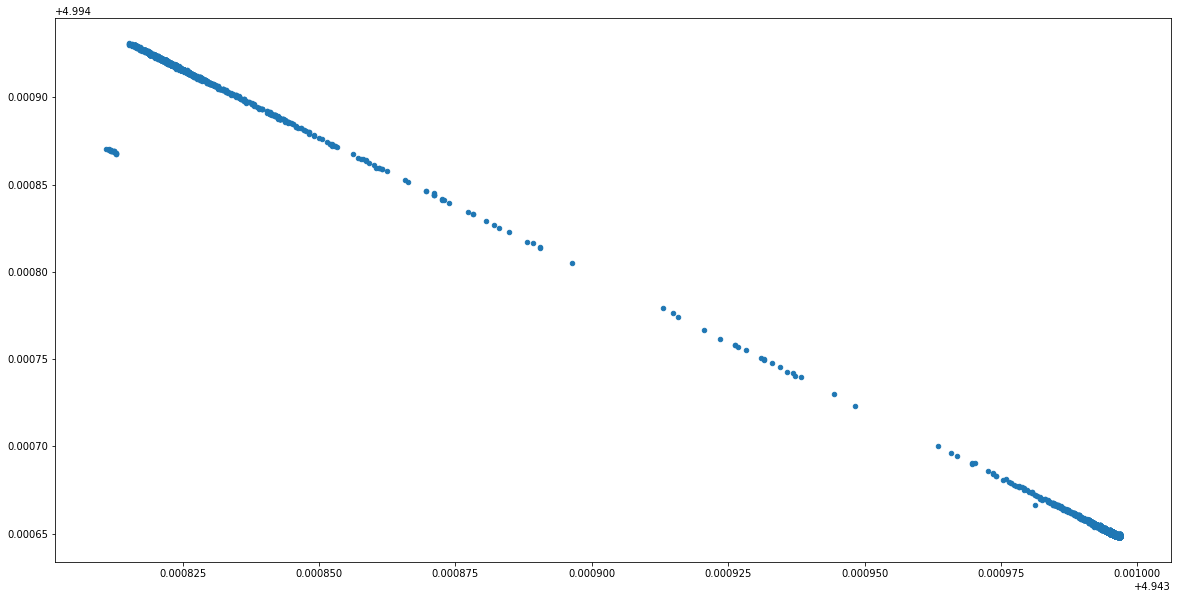

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=20, cmap='Spectral') #mahalanobis

In [70]:
df = clean_df.copy()
df.head(5)

,escuela_id,sexo,indice_socioeconomico,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.009901,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.162457,0.0,0.000000,0.000000,1.166861,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,0.000000,0.0,1.100506,0.000000,0.000000,1.104708,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,0,0,0.267,0.0,1.816327,1.0,0,1.0,2.0,0.0,0.10466,1,1,1,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,2017,0,0,0.442,1.0,1.865169,1.0,0,0.0,2.0,0.0,0.10466,1,1,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.169184,0.0,0.0,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.100506,0.0,0.000000,1.104708,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [71]:
not_nan = (df.mate_nc_na == 0) & (df.lengua_nc_na == 0) & (df.naturales_nc_na == 0) & (df.sociales_nc_na == 0)
train = df[not_nan]

#test = df[~not_nan]

In [72]:
to_keep = ['naturales_Bajo_Basico','naturales_Basico', 'naturales_satisfactorio', 'naturales_avanzado', 'sociales_Bajo_Basico', 'sociales_Basico'
  , 'sociales_satisfactorio', 'sociales_avanzado', 'lengua_Bajo_Basico', 'lengua_Basico', 'lengua_satisfactorio', 'lengua_avanzado',
  'Mate_Bajo_Basico', 'Mate_Basico', 'Mate_satisfactorio', 'Mate_avanzado'
]
train = train[to_keep]

In [73]:
train.describe()

,naturales_Bajo_Basico,naturales_Basico,naturales_satisfactorio,naturales_avanzado,sociales_Bajo_Basico,sociales_Basico,sociales_satisfactorio,sociales_avanzado,lengua_Bajo_Basico,lengua_Basico,lengua_satisfactorio,lengua_avanzado,Mate_Bajo_Basico,Mate_Basico,Mate_satisfactorio,Mate_avanzado
count,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000,380737.000000
mean,0.444771,0.588899,1.287088,0.308216,0.422928,0.585913,0.822640,0.660807,0.514820,0.557840,1.009684,0.430500,0.774991,0.682116,0.867236,0.254099
std,2.865515,3.411106,4.201137,2.890789,2.661952,3.262140,4.396467,2.682024,2.664099,3.140326,3.963941,3.583011,3.275512,3.642908,4.680177,2.822291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.057306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.485350,0.000000,0.000000,0.000000,1.000000,1.188937,0.000000,0.000000,1.311147,0.000000,1.262600,1.000000,1.060955,0.000000
max,103.211980,103.211980,103.211980,103.211980,102.775610,102.775610,102.775610,102.775610,109.784850,109.784850,109.784850,109.784850,124.452850,124.452850,124.452850,124.452850


**Min-max scale all columns between 0 and 1**

In [74]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(train.values)
train = pd.DataFrame(data=scaled_values, index=train.index, columns=train.columns)

In [ ]:
mapper = umap.UMAP(n_neighbors=200, min_dist=0.1,metric='wminkowski')

In [ ]:
%%time
mapper = mapper.fit(train.iloc[0:10000,])

/usr/local/lib/python3.6/dist-packages/umap/umap_.py:402: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  "Failed to correctly find n_neighbors for some samples."
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 12min 24s, sys: 3.4 s, total: 12min 27s
Wall time: 10min 25s


In [75]:
def label(row):
  if row['Mate_Bajo_Basico'] > 0:
    return 0
  if row['Mate_Basico'] > 0:
    return 1
  if row['Mate_satisfactorio'] > 0:
    return 2
  if row['Mate_avanzado'] > 0: 
    return 3
  else:
    return -1


In [76]:
%%capture
!pip install datashader bokeh holoviews colorcet

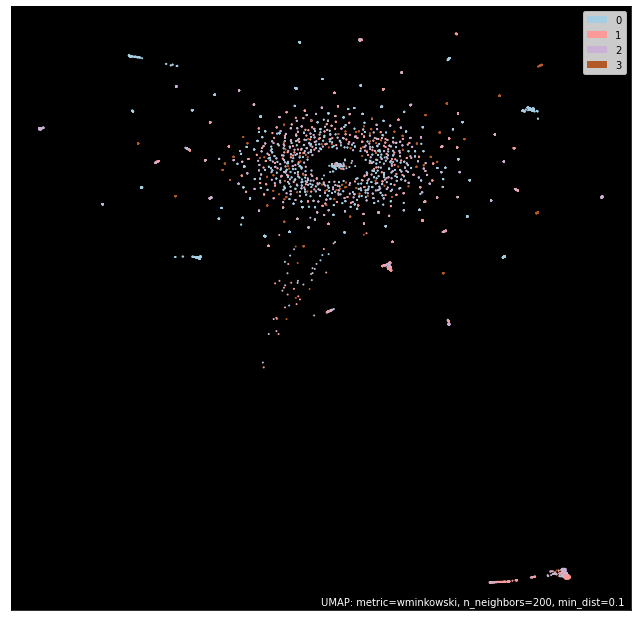

In [ ]:
import umap.plot

labels = train.iloc[0:10000,].copy()

labels = labels.apply(lambda x: label(x), axis=1)
umap.plot.points(mapper, labels=labels, color_key_cmap='Paired', background='black')

In [ ]:
mapper = umap.UMAP(n_neighbors=100, min_dist=0.1,metric='wminkowski')

In [ ]:
%%time
mapper = mapper.fit(train.iloc[0:10000,])

/usr/local/lib/python3.6/dist-packages/umap/umap_.py:402: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  "Failed to correctly find n_neighbors for some samples."
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 12min 24s, sys: 3.4 s, total: 12min 27s
Wall time: 10min 25s


In [77]:
def plot_umap(df, n_neighbors=15, min_dist=0.1,metric='wminkowski'):
  mapper = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist,metric=metric)
  mapper.fit(df.copy())
  labels = df.copy().apply(lambda x: label(x), axis=1)
  umap.plot.points(mapper, labels=labels, color_key_cmap='Paired', background='black')

In [78]:
data = train.sample(10000).copy()

/usr/local/lib/python3.6/dist-packages/umap/umap_.py:402: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  "Failed to correctly find n_neighbors for some samples."
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/umap_.py:402: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than id

CPU times: user 2h 50min 32s, sys: 1min 28s, total: 2h 52min
Wall time: 2h 45min 48s


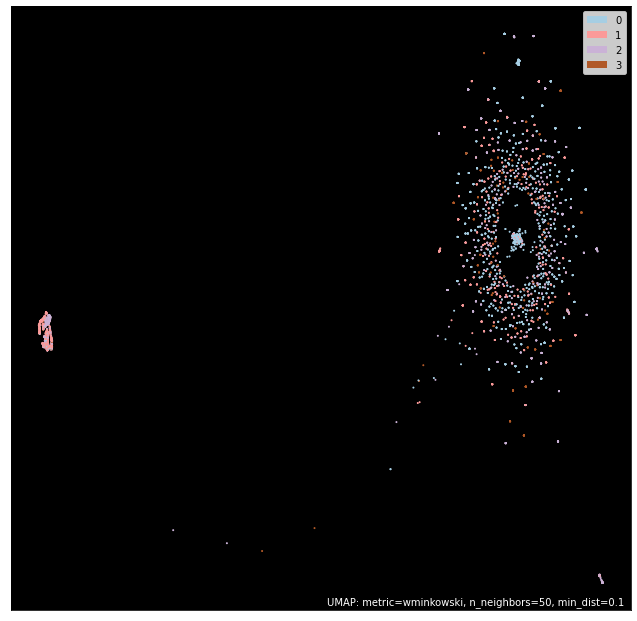

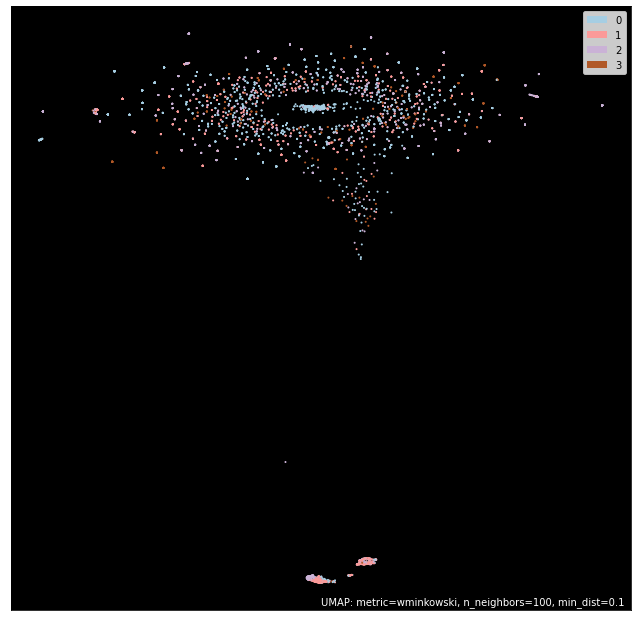

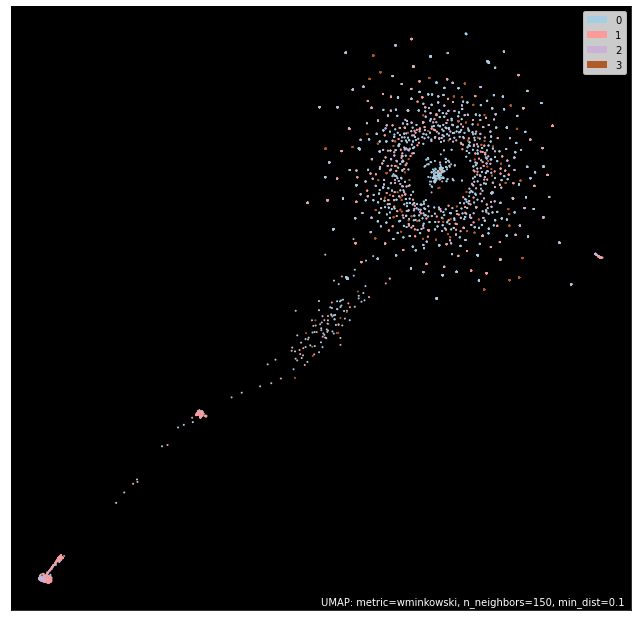

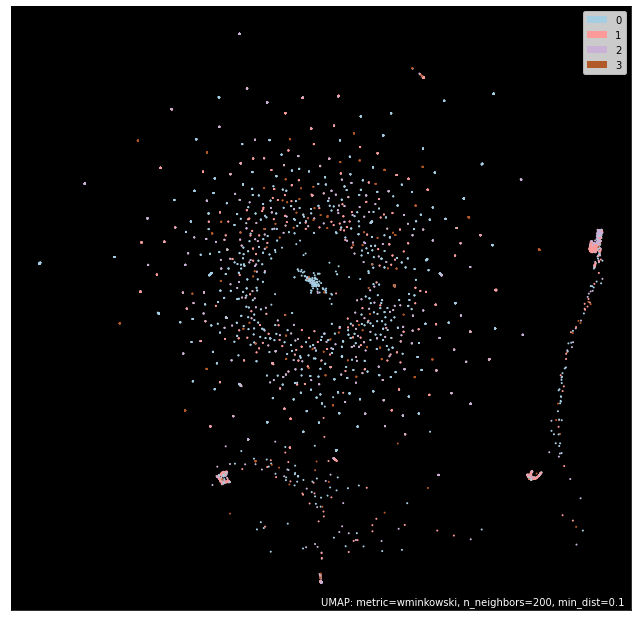

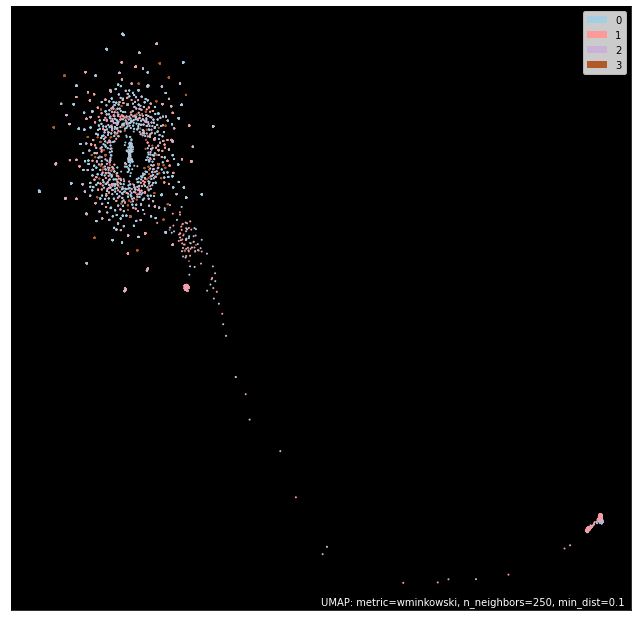

In [ ]:
%%time
size = [50, 100, 150, 200, 250]
for i in range(len(size)):
  plot_umap(df=data,n_neighbors=size[i])

In [ ]:
%%time
size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(len(size)):
  plot_umap(df=data,min_dist=size[i], n_neighbors=200)